In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [214]:
from craco import craco_candidate

cand_query_dict = {
    'sbid': '50705', 'beam': '31', 'dm': '50.372', 'lpix': '200', 'mpix': '74', 
    'ra': '268.247', 'dec': '-28.112', 'totalsample': '2991', 'scan': '00', 
    'tstart': None, 'results': 'results', 'boxcwidth': "0", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/home/gup037/tmp/b31.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB050705/cal/31/b31.aver.4pol.smooth.npy'
}


cand_query_dict = {
    'sbid': '50705', 'beam': '31', 'dm': '0', 'lpix': '200', 'mpix': '74', 
    'ra': '268.247', 'dec': '-28.112', 'totalsample': '0', 'scan': '00', 
    'tstart': None, 'results': 'results', 'boxcwidth': "0", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/home/gup037/tmp/b31.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB050705/cal/31/b31.aver.4pol.smooth.npy'
}


crow = {
    "ra_deg": float(cand_query_dict["ra"]), "dec_deg": float(cand_query_dict["dec"]),
    "dm_pccm3": float(cand_query_dict["dm"]), "total_sample": int(cand_query_dict["totalsample"]),
    "boxc_width": int(cand_query_dict["boxcwidth"]), 
    "lpix": int(cand_query_dict["lpix"]), "mpix": int(cand_query_dict["mpix"]),
}

cand = craco_candidate.Candidate(
    crow = crow,
    uvsource = cand_query_dict["uvfitspath"],
    calibration_file = cand_query_dict["calpath"],
    workdir="./test", padding=1
)

cand.search_output["obstime_sec"] = cand.search_output["total_sample"] * cand.tsamp

parsing values --ndm 2


/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'VAST_1806-25', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 268.7314452442622, -27.72666596868787, 2000.0, 268.7314452442622, -27.72666596868787, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(2, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(3, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0

Upper registers [(4, 1), (5, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1), (27, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (2, 2), (11, 2), (12, 2), (29, 2), (30, 2)]
Lower registers [(2, 3), (2, 5), (7, 8), (8, 9), (1, 13), (2, 13), (12, 13), (2, 14), (12, 14), (13, 14), (13, 15), (14, 16), (14, 17), (15, 17), (13, 18), (15, 18), (16, 18), (13, 19), (14, 19), (16, 19), (17, 19), (4, 20), (9, 20), (14, 20), (17, 20), (18, 20), (4, 21), (9, 21), (18, 21), (19, 21), (3, 22), (4, 22)]


/home/gup037/Codes/craft/src/craft/craco.py:517: UserWarning: wrong starting sample index - -1, change it to zero...
  warnings.warn(f"wrong starting sample index - {_sstart}, change it to zero...")


In [215]:
cand_query_dict2 = {
    'sbid': '50705', 'beam': '31', 'dm': '0', 'lpix': '200', 'mpix': '74', 
    'ra': '268.247', 'dec': '-28.112', 'totalsample': '2', 'scan': '00', 
    'tstart': None, 'results': 'results', 'boxcwidth': "0", 'npzfname': 
    'SB50705_B31_results_102_150_t2991.npz', 
    'uvfitspath': '/home/gup037/tmp/b31.uvfits', 
    'calpath': '/data/seren-01/big/craco/SB050705/cal/31/b31.aver.4pol.smooth.npy'
}


crow2 = {
    "ra_deg": float(cand_query_dict2["ra"]), "dec_deg": float(cand_query_dict2["dec"]),
    "dm_pccm3": float(cand_query_dict2["dm"]), "total_sample": int(cand_query_dict2["totalsample"]),
    "boxc_width": int(cand_query_dict2["boxcwidth"]), 
    "lpix": int(cand_query_dict2["lpix"]), "mpix": int(cand_query_dict2["mpix"]),
}

cand2 = craco_candidate.Candidate(
    crow = crow2,
    uvsource = cand_query_dict2["uvfitspath"],
    calibration_file = cand_query_dict2["calpath"],
    workdir="./test", padding=1
)

cand2.search_output["obstime_sec"] = cand2.search_output["total_sample"] * cand2.tsamp



cand2._calibrate_data(cand2.calibration_file)
cand2._rotate_vis()
cand2._normalise_vis()
cand2._load_burst_filterbank()
cand2._normalise_vis(target=False)
cand2._dedisperse_block(dm=cand2.search_output["dm_pccm3"])



/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'VAST_1806-25', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 268.7314452442622, -27.72666596868787, 2000.0, 268.7314452442622, -27.72666596868787, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(2, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(3, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0

parsing values --ndm 2


/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=3093.0 12-21 uvpix=(19, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=3093.0 12-21 uvpix=(20, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=3093.0 12-21 uvpix=(21, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=3093.0 12-21 uvpix=(22, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')


Upper registers [(4, 1), (5, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1), (27, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (2, 2), (11, 2), (12, 2), (29, 2), (30, 2)]
Lower registers [(2, 3), (2, 5), (7, 8), (8, 9), (1, 13), (2, 13), (12, 13), (2, 14), (12, 14), (13, 14), (13, 15), (14, 16), (14, 17), (15, 17), (13, 18), (15, 18), (16, 18), (13, 19), (14, 19), (16, 19), (17, 19), (4, 20), (9, 20), (14, 20), (17, 20), (18, 20), (4, 21), (9, 21), (18, 21), (19, 21), (3, 22), (4, 22)]


In [216]:
cand._calibrate_data(cand.calibration_file)
cand._rotate_vis()
cand._normalise_vis()
cand._load_burst_filterbank()
cand._normalise_vis(target=False)
cand._dedisperse_block(dm=cand.search_output["dm_pccm3"])

In [217]:
from craft.craco_plan import get_parser

values = get_parser().parse_args("")
values.ndm = 2
values.nt = 2
values.uv = cand_query_dict['uvfitspath']
values.cf = cand_query_dict['calpath']

In [218]:
from craft.craco_kernels import Gridder, Imager, CracoPipeline
from craft import craco_plan, uvfits
from craco import preprocess
from craft.craco import bl2array, bl2ant

In [219]:
imager = Imager(cand.uvsource, cand.plan, values)

### Image with old gridder

In [220]:
def _image_gridded_data(data, imager):
    assert len(data.shape) == 2, "only 2D uv data is allowed..."
    return imager(np.fft.fftshift(data)).astype(np.complex64)

In [221]:
cand.dedisp_data.shape

(253, 120, 2)

In [222]:
old_gridder = Gridder(cand.uvsource, cand.plan, values)
old_grid_data = old_gridder(cand.dedisp_data)
_imgcube = np.array([
    _image_gridded_data(old_grid_data[..., i], imager)
    for i in range(old_grid_data.shape[-1])
])

old_imgcube = []
for i in _imgcube:
    old_imgcube.append([i.real])
    old_imgcube.append([i.imag])
old_imgcube = np.concatenate(old_imgcube)

<IPython.core.display.Javascript object>


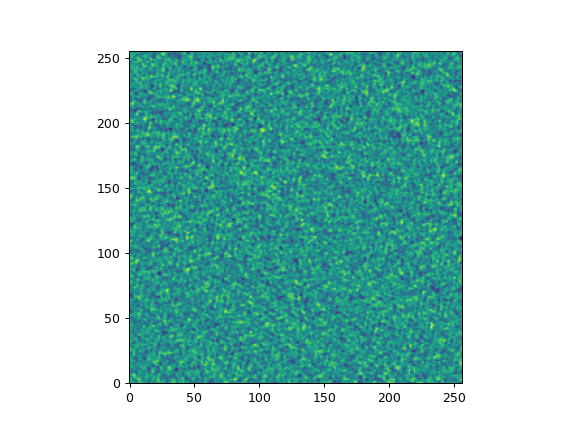

In [238]:
plt.figure()
plt.imshow(old_imgcube[0], origin="lower")

### Image with new gridder

In [224]:
cand._burst_uvws[258.0], cand2._burst_uvws[258.0]

(array([[-7.49559774e-08, -7.49555511e-08],
        [ 5.95609215e-08,  5.95612022e-08],
        [ 2.88070137e-08,  2.88075483e-08]]),
 array([[-7.49555511e-08, -7.49551248e-08],
        [ 5.95612022e-08,  5.95614829e-08],
        [ 2.88075483e-08,  2.88080848e-08]]))

In [229]:
cand.dedisp_data.shape, cand2.dedisp_data.shape, cand.search_output['total_sample'], cand2.search_output['total_sample'], cand.search_output['dm_pccm3'], cand2.search_output['dm_pccm3']

((253, 120, 2), (253, 120, 2), 0, 2, 0.0, 0.0)

In [232]:
np.all(cand.burst_data[..., -1] == cand2.burst_data[..., 0])

True

In [233]:
new_gridder = Gridder(cand.uvsource, cand.plan, values)
new_grid_data = new_gridder.grid_with_uvws(cand.dedisp_data, cand2._burst_uvws)
_imgcube = np.array([
    _image_gridded_data(new_grid_data[..., i], imager)
    for i in range(new_grid_data.shape[-1])
])

new_imgcube = []
for i in _imgcube:
    new_imgcube.append([i.real])
    new_imgcube.append([i.imag])
new_imgcube = np.concatenate(new_imgcube)

/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(2, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(3, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0, 253)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0, 252)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=527.0 2-15 uvpix=(206, 

<IPython.core.display.Javascript object>


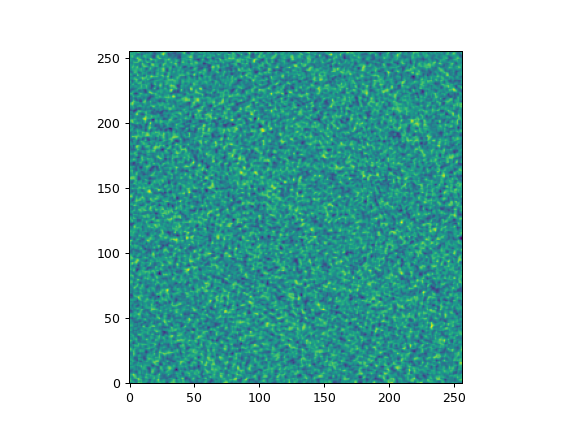

In [239]:
plt.figure()
plt.imshow(new_imgcube[0], origin="lower")

In [235]:
np.allclose(new_imgcube[0],old_imgcube[0])

False

In [236]:
(new_imgcube[0] - old_imgcube[0]) / old_imgcube[0]

array([[ 2.5635952e-01, -1.2405552e+01,  1.0416004e-02, ...,
         4.8232232e-03,  2.2764467e-02, -2.0413242e-02],
       [ 2.4298675e-02,  7.8232912e-03, -1.7084027e-02, ...,
         1.2763281e-01,  1.9165477e-02,  2.4827141e-02],
       [ 4.8569753e-03, -1.2977163e-02,  8.7860882e-02, ...,
         7.2020367e-02,  3.1266380e-02,  7.9629133e-03],
       ...,
       [ 4.1889707e-03,  1.6620394e-03,  4.2377453e-02, ...,
         1.9892307e-02,  2.7252594e-02,  1.6865639e-02],
       [ 9.8158829e-02, -7.9116851e-02, -9.8955250e-01, ...,
         1.9788414e-02,  5.3941522e-02,  6.8044178e-02],
       [-3.3968902e-01, -3.5219230e-02, -4.0316418e-02, ...,
         1.7737746e-02,  5.6914251e-02, -3.4377113e-02]], dtype=float32)

<IPython.core.display.Javascript object>


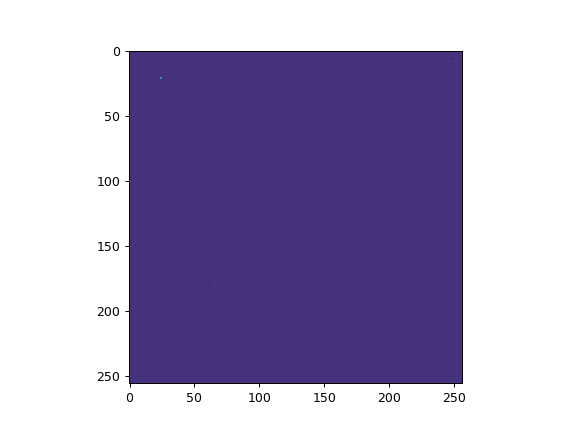

In [247]:
plt.figure()
plt.imshow((new_imgcube[0] - old_imgcube[0]) / (old_imgcube[0] + 1))

In [5]:
old_blocker = cand.uvsource.time_blocks(nt = 8)
old_block = next(old_blocker)  #this block should have time stamps 0 - 7 inclusive
old_block = next(old_blocker)  #this block should have time stamps 8 - 15 inclusive


NameError: name 'cand' is not defined

In [6]:
new_blocker = cand.uvsource.time_blocks_with_uvws(nt = 8)
new_block, new_uvws = next(new_blocker)
new_block, new_uvws = next(new_blocker)

NameError: name 'cand' is not defined

In [7]:
from craft.craco import bl2array
assert np.all(bl2array(old_block) == bl2array(new_block))

NameError: name 'old_block' is not defined

In [ ]:
burst_block, burst_uvws, burst_vis = cand.uvsource.time_block_with_uvw_range((8, 15))

In [ ]:
assert np.all(bl2array(burst_block) == bl2array(new_block))

In [ ]:
bl2array(old_block)[0, 0, 0, :]

In [ ]:
bl2array(new_block)[0, 0, 0, :]

In [ ]:
bl2array(burst_block)[0, 0, 0, :]

In [ ]:
new_uvw_keys = new_uvws.keys()
burst_keys = burst_uvws.keys()
assert new_uvw_keys == burst_keys

In [ ]:
burst_vis

In [6]:
uvsource = uvfits.open(values.uv)

In [7]:
py_plan = craco_plan.PipelinePlan(uvsource, values)

/home/gup037/Codes/craft/src/craft/uvfits.py:269: UserWarning: Dont yet support multiple source files: 2 - using source at 2 which is (2, 'VAST_1806-25', 0, '', 0.0, 0.0, 0.0, 0.0, 0.0, 119.99999999999982, 268.7314452442622, -27.72666596868787, 2000.0, 268.7314452442622, -27.72666596868787, 0.0, 0.0, 0.0, 0.0)
  warnings.warn(f'Dont yet support multiple source files: {len(source_table)} - using source at {first_targetidx} which is {row}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(2, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=259.0 1-3 uvpix=(3, 0)
  warnings.warn(f'Cannot grid things on U=0 or V=0 blid={blid} {a1}-{a2} uvpix={uvpix}')
/home/gup037/Codes/craft/src/craft/craco_plan.py:145: UserWarning: Cannot grid things on U=0 or V=0 blid=260.0 1-4 uvpix=(0

Upper registers [(4, 1), (5, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1), (27, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (2, 2), (11, 2), (12, 2), (29, 2), (30, 2)]
Lower registers [(2, 3), (2, 5), (7, 8), (8, 9), (1, 13), (2, 13), (12, 13), (2, 14), (12, 14), (13, 14), (13, 15), (14, 16), (14, 17), (15, 17), (13, 18), (15, 18), (16, 18), (13, 19), (14, 19), (16, 19), (17, 19), (4, 20), (9, 20), (14, 20), (17, 20), (18, 20), (4, 21), (9, 21), (18, 21), (19, 21), (3, 22), (4, 22)]


In [8]:
old_uvdata_source = uvsource.time_blocks(py_plan.nt)
new_uvdata_souce = uvsource.time_blocks_with_uvws(py_plan.nt)

old_b1 = next(old_uvdata_source)
new_b1, uvws_b1 = next(new_uvdata_souce)


In [9]:
assert(np.all(bl2array(old_b1) == bl2array(new_b1)))

In [10]:
plan_uvws = np.zeros((len(py_plan.baselines), 3))
ibl = 0
for blid, bldata in py_plan.baselines.items():
    plan_uvws[ibl, :] = bldata['UU'], bldata['VV'], bldata['WW']
    ibl += 1
    
time_wise_uvws = np.zeros((len(py_plan.baselines), 3, py_plan.nt))
ibl = 0
for blid, bldata in uvws_b1.items():
    time_wise_uvws[ibl, :, :] = bldata[:, :]
    ibl += 1

In [11]:
plan_uvws

array([[-7.49559774e-08,  5.95609215e-08,  2.88070137e-08],
       [-1.14091641e-07, -2.03270534e-09,  4.47653719e-08],
       [ 6.87729074e-09, -1.20308684e-07, -2.78298873e-09],
       [ 2.08202607e-07, -1.49686826e-07, -7.89561128e-08],
       [-4.81124175e-07, -2.82053861e-07,  1.83543833e-07],
       [-6.76953505e-07,  5.12736733e-07,  2.65373671e-07],
       [ 2.59715108e-07,  7.57941052e-07, -8.64939977e-08],
       [ 6.81625863e-07, -5.15531497e-07, -2.64321244e-07],
       [ 1.29259448e-07, -9.76502520e-07, -5.48226140e-08],
       [-1.02377237e-06, -9.48086324e-07,  3.79775202e-07],
       [-1.37392340e-06, -6.34894946e-07,  5.13693749e-07],
       [-1.12722614e-06,  1.46830507e-06,  4.38941328e-07],
       [ 3.53951663e-07,  1.49198797e-06, -1.10129101e-07],
       [ 2.36735696e-06,  5.34301208e-08, -8.74286513e-07],
       [ 1.73313367e-06, -1.59696572e-06, -6.62759078e-07],
       [ 1.21216385e-06, -2.02430624e-06, -4.71388319e-07],
       [ 1.04013722e-07, -1.29780085e-06

In [12]:
time_wise_uvws[..., 0]

array([[-7.49559774e-08,  5.95609215e-08,  2.88070137e-08],
       [-1.14091641e-07, -2.03270534e-09,  4.47653719e-08],
       [ 6.87729074e-09, -1.20308684e-07, -2.78298873e-09],
       [ 2.08202607e-07, -1.49686826e-07, -7.89561128e-08],
       [-4.81124175e-07, -2.82053861e-07,  1.83543833e-07],
       [-6.76953505e-07,  5.12736733e-07,  2.65373671e-07],
       [ 2.59715108e-07,  7.57941052e-07, -8.64939977e-08],
       [ 6.81625863e-07, -5.15531497e-07, -2.64321244e-07],
       [ 1.29259448e-07, -9.76502520e-07, -5.48226140e-08],
       [-1.02377237e-06, -9.48086324e-07,  3.79775202e-07],
       [-1.37392340e-06, -6.34894946e-07,  5.13693749e-07],
       [-1.12722614e-06,  1.46830507e-06,  4.38941328e-07],
       [ 3.53951663e-07,  1.49198797e-06, -1.10129101e-07],
       [ 2.36735696e-06,  5.34301208e-08, -8.74286513e-07],
       [ 1.73313367e-06, -1.59696572e-06, -6.62759078e-07],
       [ 1.21216385e-06, -2.02430624e-06, -4.71388319e-07],
       [ 1.04013722e-07, -1.29780085e-06

In [13]:
time_wise_uvws[..., 0] == plan_uvws

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [14]:

def get_uvcells(nt = 256):
    for it in range(nt):
        _ = craco_plan.get_uvcells(baselines = py_plan.baselines, uvcell = py_plan.uvcell, freqs = py_plan.freqs, Npix = values.npix)
    return

%time get_uvcells()

CPU times: user 19.3 s, sys: 36.6 ms, total: 19.3 s
Wall time: 19.3 s


In [15]:
py_plan.baselines[258.0]['UU']

-7.495598e-08

In [16]:
uvsource.baselines[259.0]['UU']

-1.1409164e-07

In [33]:
uvsource.vis[1]

(-1.1409164e-07, -2.0327053e-09, 4.4765372e-08, 2460118.23635635, 259., 1., 2., 0.110592, [[[[[[ 3.080e+02, -7.430e+02,  1.000e+00]], [[-8.600e+02,  4.730e+02,  1.000e+00]], [[ 6.170e+02,  4.250e+02,  1.000e+00]], [[-1.890e+03, -1.343e+03,  1.000e+00]], [[-6.800e+01, -1.738e+03,  1.000e+00]], [[-1.285e+03, -5.720e+02,  1.000e+00]], [[-1.049e+03, -1.834e+03,  1.000e+00]], [[ 7.560e+02,  6.000e+02,  1.000e+00]], [[-1.318e+03,  6.340e+02,  1.000e+00]], [[-1.790e+02, -5.200e+01,  1.000e+00]], [[ 7.620e+02, -1.297e+03,  1.000e+00]], [[ 1.144e+03, -1.302e+03,  1.000e+00]], [[-5.050e+02, -2.609e+03,  1.000e+00]], [[ 1.282e+03, -2.790e+02,  1.000e+00]], [[ 7.170e+02, -1.653e+03,  1.000e+00]], [[ 1.229e+03,  7.290e+02,  1.000e+00]], [[-6.500e+01, -6.460e+02,  1.000e+00]], [[ 3.780e+02,  2.440e+02,  1.000e+00]], [[-4.480e+02, -1.142e+03,  1.000e+00]], [[-2.950e+02, -1.542e+03,  1.000e+00]], [[ 1.764e+03, -5.460e+02,  1.000e+00]], [[-5.390e+02,  1.320e+02,  1.000e+00]], [[ 2.059e+03, -6.800e+02, 

In [4]:

from craft.craco import bl2ant, bl2array

In [32]:
bl2ant(258.0)

(1, 2)

In [36]:
uvsource.start_date, uvsource.vis[0]['DATE']


(2460118.236356352, 2460118.236356352)

In [37]:
uvsource.ignore_autos

True

In [3]:
from craco.preprocess import normalise as N

In [42]:
fake_block = np.ones((4, 30)) * 10000 + 1j* np.ones((4, 30)) * 10000
fake_block += np.random.normal(0, 1, fake_block.size).reshape(fake_block.shape)
fake_block += 1j * np.random.normal(0, 1, fake_block.size).reshape(fake_block.shape)
fake_block[1:3, 2:8] = 0
my_mask = np.zeros_like(fake_block)
my_mask[1:3, 2:8] = True
fake_block = np.ma.MaskedArray(data = fake_block, mask = my_mask)

<IPython.core.display.Javascript object>


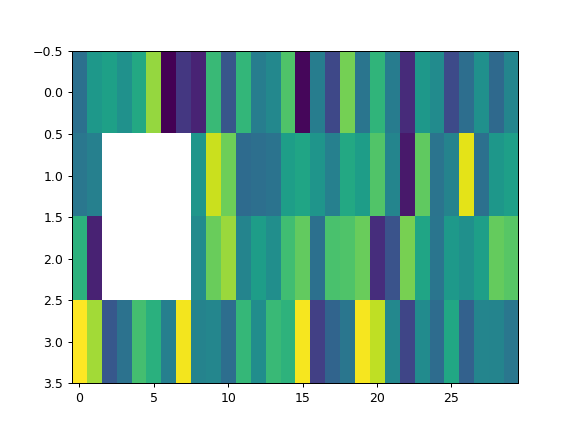

masked_array(
  data=[[(9999.35321730477+9999.610235818589j),
         (10000.00634620008+10000.075692885206j),
         (10000.150119789378+10001.30016915224j),
         (9999.906613673716+9998.599301789527j),
         (10000.293683448645+10000.94262057865j),
         (10001.266169023189+9999.778398282788j),
         (9997.856057861636+9998.93993091429j),
         (9998.517417754423+9998.874159855626j),
         (9998.261759967414+9999.405797588786j),
         (10000.589786696326+9999.529185155881j),
         (9998.940444830137+9999.453957533397j),
         (10000.539912879789+10000.770644181506j),
         (9999.573752295844+10000.1017236907j),
         (9999.746921925434+10000.60995761649j),
         (10000.790843276734+10000.453403973805j),
         (9997.93375600111+10000.615592119342j),
         (9999.568425468073+9999.47818545536j),
         (9998.732444481351+9999.366079721j),
         (10001.052724278145+9999.879463606874j),
         (9999.430116450656+10000.740870555806j),
  

In [61]:
plt.figure()
plt.imshow(fake_block.real, aspect='auto', interpolation="None")
fake_block

In [44]:
norm_block = N(fake_block)

In [45]:
existing_rms = fake_block.std(axis=-1) / np.sqrt(2)

In [46]:
existing_rms

masked_array(data=[0.8269468688825113, 0.9512626843304759,
                   0.9947580197455281, 0.9494569002906821],
             mask=[False, False, False, False],
       fill_value=(1e+20+0j))

In [49]:
existing_mean = np.mean(fake_block, axis=-1, keepdims = True)

In [50]:
existing_mean

masked_array(
  data=[[(9999.588102470514+9999.969647193504j)],
        [(9999.993970986685+9999.707176320397j)],
        [(10000.154796070216+9999.962661697093j)],
        [(10000.0816178329+9999.604996504904j)]],
  mask=[[False],
        [False],
        [False],
        [False]],
  fill_value=(1e+20+0j))

In [52]:
fake_block - existing_mean

masked_array(
  data=[[(-0.2348851657443447-0.3594113749149983j),
         (0.4182437295658019+0.10604569170209288j),
         (0.5620173188635817+1.3305219587364263j),
         (0.31851120320243353-1.3703454039768985j),
         (0.7055809781304561+0.9729733851454512j),
         (1.6780665526748635-0.19124891071624006j),
         (-1.7320446088779136-1.0297162792139716j),
         (-1.0706847160909092-1.0954873378777847j),
         (-1.3263425031000224-0.5638496047176886j),
         (1.001684225811914-0.4404620376226376j),
         (-0.6476576403765648-0.515689660107455j),
         (0.9518104092749127+0.8009969880022254j),
         (-0.014350174669743865+0.13207649719515757j),
         (0.1588194549203763+0.6403104229866585j),
         (1.2027408062203904+0.48375678030060953j),
         (-1.6543464694041177+0.6459449258381937j),
         (-0.019677002441312652-0.4914617381436983j),
         (-0.8556579891628644-0.6035674725044373j),
         (1.464621807630465-0.09018358662979153j),
 

In [55]:
new_fake_block = (fake_block - existing_mean) * (1 / existing_rms)[:, None]

In [56]:
new_fake_block

masked_array(
  data=[[(-0.28403900490215905-0.43462450665142044j),
         (0.5057685630166211+0.12823761198273473j),
         (0.6796292966476308+1.6089570065540215j),
         (0.3851652569080422-1.657114205932849j),
         (0.853236168708079+1.1765851250640464j),
         (2.0292314002500627-0.23127109843789953j),
         (-2.0945053111072296-1.2452024645857493j),
         (-1.294744265176034-1.3247372704345126j),
         (-1.6039029265475857-0.6818450204420542j),
         (1.2113042125252047-0.5326364415864502j),
         (-0.7831913569632016-0.6236067630370601j),
         (1.1509934254435654+0.9686196515679985j),
         (-0.017353200320034914+0.15971581992158482j),
         (0.19205521043328436+0.7743066055161892j),
         (1.4544354074956538+0.5849913682535987j),
         (-2.000547473672289+0.7811202268787677j),
         (-0.02379476019771745-0.5943087236158613j),
         (-1.0347194255891574-0.7298745484338841j),
         (1.7711195999927676-0.10905608331483313j),
  

<IPython.core.display.Javascript object>


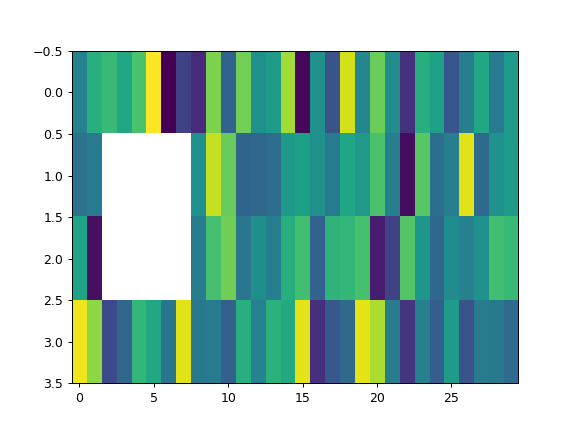

In [62]:
plt.figure()
plt.imshow(new_fake_block.real, aspect='auto')

<IPython.core.display.Javascript object>


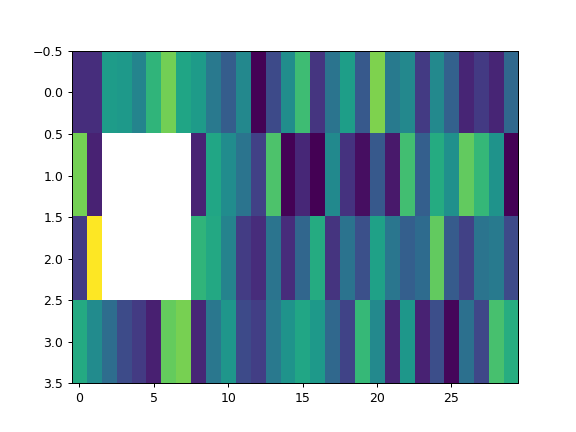

In [58]:
plt.figure()
plt.imshow(np.abs(norm_block), aspect='auto')

In [59]:
norm_block

masked_array(
  data=[[(-0.28403900490215905-0.43462450665142044j),
         (0.5057685630166211+0.12823761198273473j),
         (0.6796292966476308+1.6089570065540215j),
         (0.3851652569080422-1.657114205932849j),
         (0.853236168708079+1.1765851250640464j),
         (2.0292314002500627-0.23127109843789953j),
         (-2.0945053111072296-1.2452024645857493j),
         (-1.294744265176034-1.3247372704345126j),
         (-1.6039029265475857-0.6818450204420542j),
         (1.2113042125252047-0.5326364415864502j),
         (-0.7831913569632016-0.6236067630370601j),
         (1.1509934254435654+0.9686196515679985j),
         (-0.017353200320034914+0.15971581992158482j),
         (0.19205521043328436+0.7743066055161892j),
         (1.4544354074956538+0.5849913682535987j),
         (-2.000547473672289+0.7811202268787677j),
         (-0.02379476019771745-0.5943087236158613j),
         (-1.0347194255891574-0.7298745484338841j),
         (1.7711195999927676-0.10905608331483313j),
  

In [60]:
np.all(new_fake_block == norm_block)

True

<IPython.core.display.Javascript object>


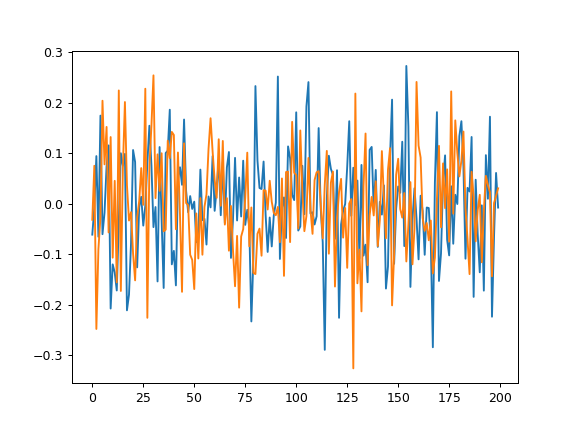

In [142]:
plt.figure()
plt.plot(norm_block.mean(axis=0).real)
plt.plot(norm_block.mean(axis=0).imag)


In [139]:
fname = "/data/seren-10/big/craco/SB050705/scans/00/20230622173926/results/b29.uvfits"
f = uvfits.open(fname)

In [140]:
datasource = f.time_blocks_with_uvws(nt = 256)
blocksource = f.time_blocks(nt = 256)

In [141]:
block0, uvw0 = next(datasource)
block0only = next(blocksource)

In [142]:
block0arr = bl2array(block0)
data_mask = block0arr.mask
#block0arr += np.ma.MaskedArray(np.random.normal(10000, 2000, block0arr.size).reshape(block0arr.shape), mask=data_mask)
block0arr

masked_array(
  data=[[[[(-1229+1551j), (-1376+2398j), (-333-452j), ...,
           (-905+2207j), (134-887j), (-486-362j)]],

         [[(421+1761j), (-1683+1037j), (-2060+3715j), ...,
           (-370+1766j), (-28+3223j), (-1622+3094j)]],

         [[(-1514+751j), (-2113+986j), (-1201+1326j), ..., (59+1303j),
           (-1188+1599j), (-1125-65j)]],

         ...,

         [[(-1010+1025j), (-1346+1212j), (-130+967j), ...,
           (-1499+2248j), (-889+1023j), (-1806+596j)]],

         [[(-1369+552j), (-1817+685j), (-1414+470j), ...,
           (-1793+1438j), (-1364+579j), (-1762+494j)]],

         [[(-2901+350j), (-1267+770j), (-2109+918j), ..., (-1061+713j),
           (-250+682j), (-1928+938j)]]],


        [[[(95+430j), (-276-1141j), (2567-2932j), ..., (1709-1476j),
           (2387-419j), (2421-329j)]],

         [[(207-257j), (733+1154j), (998-1070j), ..., (1823-610j),
           (219-598j), (1707-488j)]],

         [[(1509-246j), (2147-325j), (2059-748j), ..., (1571-1327j),
 

In [143]:
for ibl, bldata in block0only.items():
    print(ibl, np.any(bldata.mask), type(bldata))

258.0 False <class 'numpy.ma.core.MaskedArray'>
259.0 False <class 'numpy.ma.core.MaskedArray'>
260.0 False <class 'numpy.ma.core.MaskedArray'>
261.0 False <class 'numpy.ma.core.MaskedArray'>
262.0 False <class 'numpy.ma.core.MaskedArray'>
263.0 False <class 'numpy.ma.core.MaskedArray'>
264.0 False <class 'numpy.ma.core.MaskedArray'>
265.0 False <class 'numpy.ma.core.MaskedArray'>
266.0 False <class 'numpy.ma.core.MaskedArray'>
267.0 False <class 'numpy.ma.core.MaskedArray'>
268.0 False <class 'numpy.ma.core.MaskedArray'>
269.0 False <class 'numpy.ma.core.MaskedArray'>
270.0 False <class 'numpy.ma.core.MaskedArray'>
271.0 False <class 'numpy.ma.core.MaskedArray'>
272.0 False <class 'numpy.ma.core.MaskedArray'>
273.0 False <class 'numpy.ma.core.MaskedArray'>
274.0 False <class 'numpy.ma.core.MaskedArray'>
275.0 False <class 'numpy.ma.core.MaskedArray'>
276.0 False <class 'numpy.ma.core.MaskedArray'>
277.0 False <class 'numpy.ma.core.MaskedArray'>
278.0 False <class 'numpy.ma.core.Masked

<IPython.core.display.Javascript object>


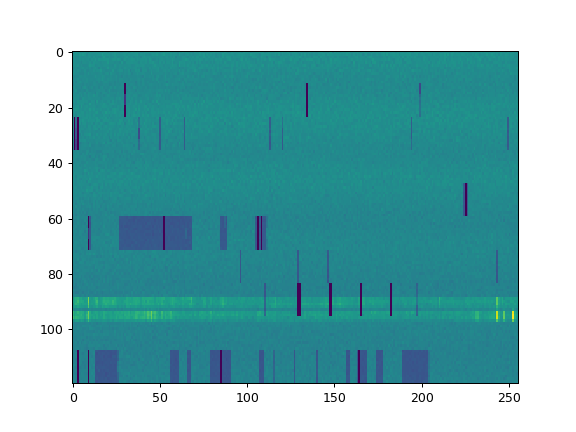

In [144]:
plt.figure()
plt.imshow(np.abs(block0arr).mean(axis=0).squeeze(), aspect='auto', interpolation='None')

In [145]:
normed_block0arr = np.abs(N(block0arr)).mean(axis=0).squeeze()

<IPython.core.display.Javascript object>


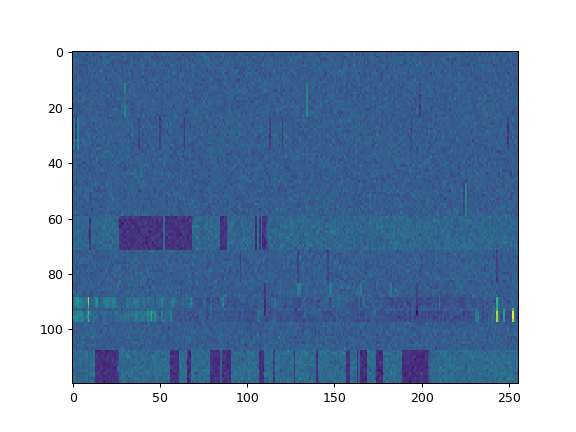

In [146]:
plt.figure()
plt.imshow(normed_block0arr, aspect='auto', interpolation='None')

In [95]:
normed_block0arr[59].std(), normed_block0arr[60].std()

(0.04944376118734692, 0.04367538369543041)

<IPython.core.display.Javascript object>


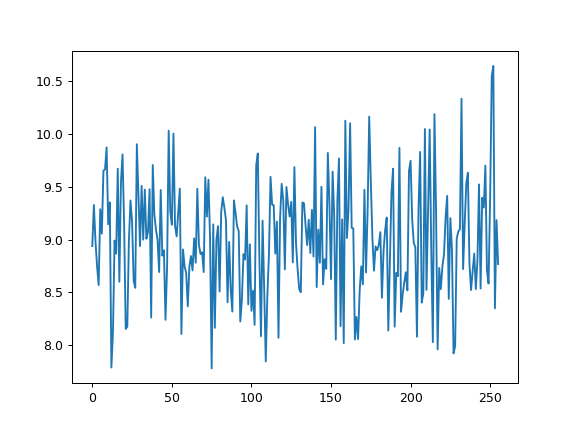

In [96]:
ts = normed_block0arr.sum(axis=0)
plt.figure()
plt.plot(ts)

<IPython.core.display.Javascript object>


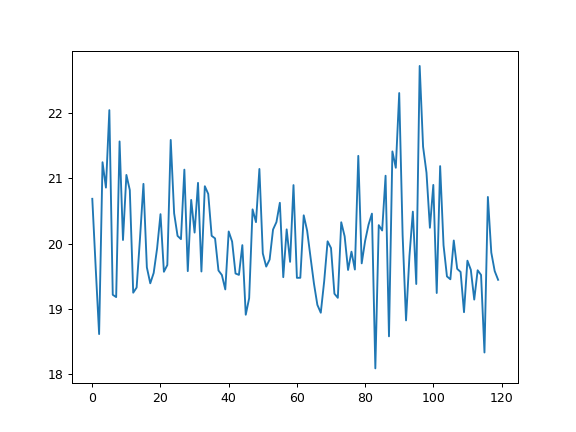

In [80]:
fs = normed_block0arr.sum(axis=-1)
plt.figure()
plt.plot(fs)

In [127]:
f.mask

True

In [132]:
for irow in range(2560):
    row = f.vis[irow]
    data = row["DATA"]
    print(np.any(data[..., 2] == 0))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals